<a href="https://colab.research.google.com/github/stratnaparkhi026/EDA-project-Airbnb-Booking-Analysis/blob/main/Copy_of_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/project/Copy of Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
airbnb_df.shape

(48895, 16)

In [12]:
Airbnb_df = airbnb_df.drop_duplicates()
Airbnb_df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [13]:
total_null = airbnb_df.isnull().sum().sum()
print("total null values in dataset: ",total_null)

total null values in dataset:  20141


In [14]:
nan_count = airbnb_df.isna().sum()
print(nan_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [15]:
# Out of these four columns three of them contains object or string as a datatype. So it is better to remove all the rows having null values.
airbnb_df.dropna(subset=['name','host_name',"last_review","reviews_per_month"], inplace=True)

In [16]:
# Lets check whether the null-values are removed or not.
print(airbnb_df.isna().sum())
print(airbnb_df.shape)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
(38821, 16)


<ipython-input-17-4e58f11002fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(airbnb_df.corr(), dtype=bool))
<ipython-input-17-4e58f11002fc>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(data = airbnb_df.corr(), mask = mask, annot = True, cmap = cmap, fmt='.2f')


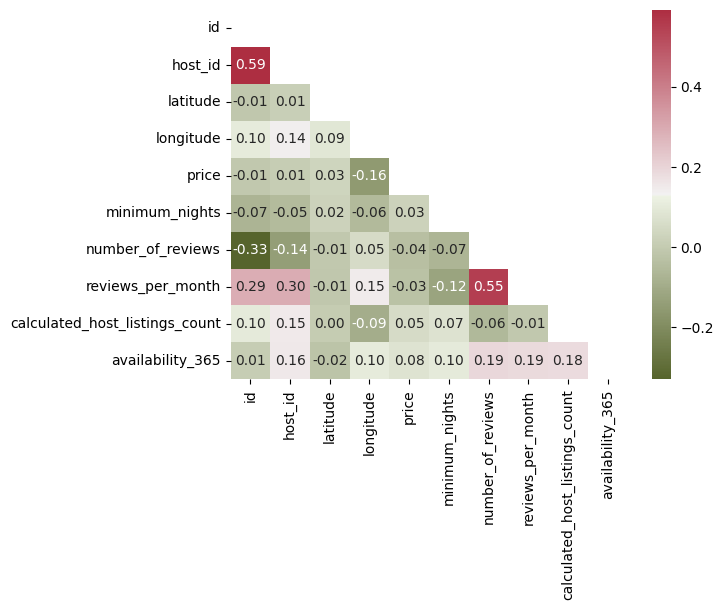

In [17]:
# Lets check correlation between the columns.
mask = np.triu(np.ones_like(airbnb_df.corr(), dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
hm = sns.heatmap(data = airbnb_df.corr(), mask = mask, annot = True, cmap = cmap, fmt='.2f')
plt.show()

In [18]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
# Airbnb_df.nunique(['id','name','host_name','neighbourhood_group','neighbourhood'], inplace=True)
print("id: ", Airbnb_df['id'].nunique())
print("name: ", Airbnb_df['name'].nunique())
print("host_name: ", Airbnb_df['host_name'].nunique())
print('neighbourhood:', Airbnb_df['neighbourhood'].nunique())
print("neighbourhood_group: ", Airbnb_df['neighbourhood_group'].nunique())

id:  48895
name:  47905
host_name:  11452
neighbourhood: 221
neighbourhood_group:  5


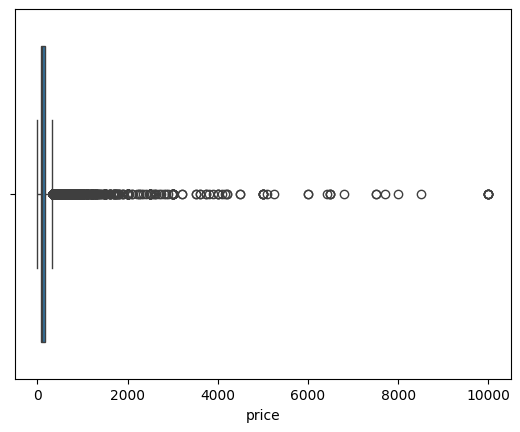

In [19]:
sns.boxplot(x = Airbnb_df['price'])
plt.show()

In [20]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

shape of the dataset before removing outlier: (48895, 16)
shape of the dataset after removing outlier: (45918, 16)


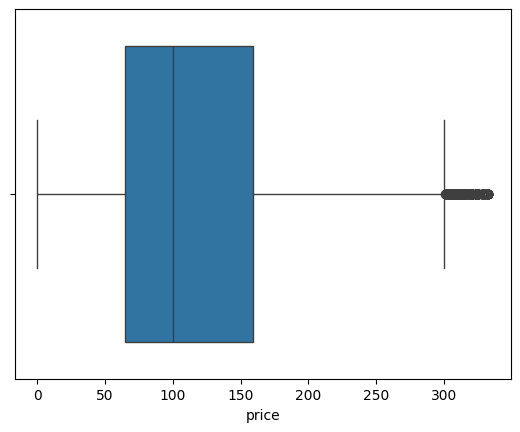

In [21]:
lower_bound,upper_bound=iqr_technique(Airbnb_df['price'])

Airbnb_df1 = Airbnb_df[(Airbnb_df.price>lower_bound) & (Airbnb_df.price<upper_bound)]
# print("\nOutliers detected using IQR Outlier Removal: ",Airbnb_df['price'])

# so the outliers are removed from price column now check with boxplot and also check shape of new Dataframe!

sns.boxplot(x = Airbnb_df1['price'])
print("shape of the dataset before removing outlier:", Airbnb_df.shape)
print("shape of the dataset after removing outlier:", Airbnb_df1.shape)


**(1) Distribution Of Airbnb Bookings Price Range Using Histogram**

<ipython-input-22-c83458cbbb8e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Airbnb_df1['price'],color=('r'))


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

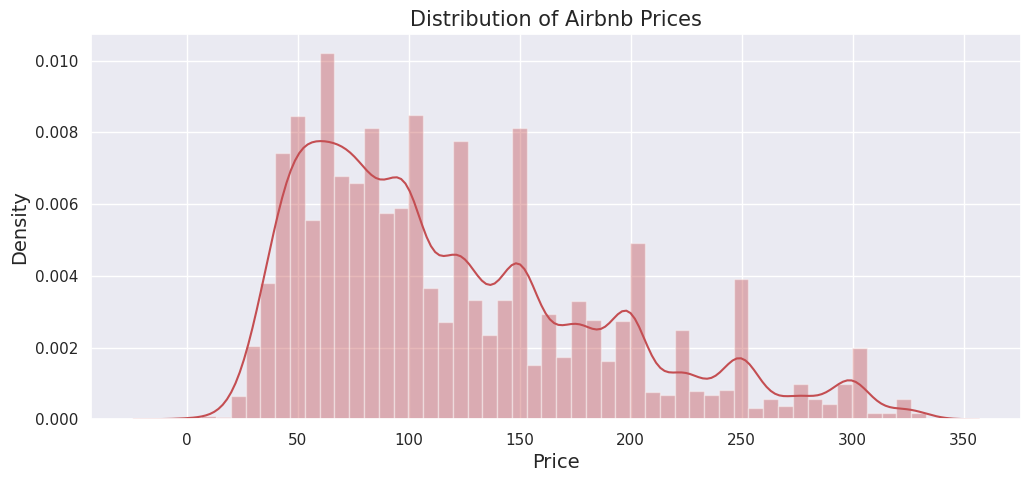

In [22]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(Airbnb_df1['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

In [24]:
Air=Airbnb_df1.price.value_counts()
Air.sort_values().tail()

200    1401
60     1458
50     1534
150    2047
100    2051
Name: price, dtype: int64